# Basic Usage

<h2>Loading Relevant Libraries</h2>

In [124]:
from FLD_methods import *

<h2>Load Example Spectral Data From SCOPE</h2>

In [125]:
e_spectra = get_simulated_spectral_df('Esun_example.csv')
l_spectra = get_simulated_spectral_df('Lo_spectrum_inclF_example.csv')

The 'get_simulated_spectral_df' function extracts the hyperspectral data from a csv file and places it in a pandas dataframe with columns named from 400 to 2562.

In [126]:
e_spectra.head() # show the top of the pandas dataframe containing the E_spectra

,400,401,402,403,404,405,406,407,408,409,...,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561
0,336.01160,315.72190,342.59300,321.27470,350.8413,313.92670,310.36930,322.30000,331.49800,366.95710,...,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07,9.213793e-07
1,16.33707,15.35058,16.65706,15.62056,17.0581,15.26329,15.09033,15.67041,16.11762,17.84166,...,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07,9.212117e-07
2,164.84230,154.88850,168.07100,157.61260,172.1175,154.00780,152.26260,158.11560,162.62800,180.02370,...,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07,9.210900e-07
3,460.00450,432.22780,469.01460,439.82960,480.3066,429.77010,424.89990,441.23320,453.82550,502.36950,...,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07,9.213486e-07
4,230.18830,216.28870,234.69700,220.09270,240.3476,215.05880,212.62180,220.79500,227.09630,251.38790,...,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07,9.212103e-07


<h2>Apply the FLD Methods to the First Row of the Spectras to Extract the Fluorescence</h2>

In [127]:
# get the first rows of the spectra dataframes
# the methods take the spectras a np arrays so convert the object to this type

e_first_row = np.asarray(e_spectra.iloc[0])
l_first_row = np.asarray(l_spectra.iloc[0])
wavelengths = np.arange(400, 2562) # define the wavelengths at which the spectras were sampled

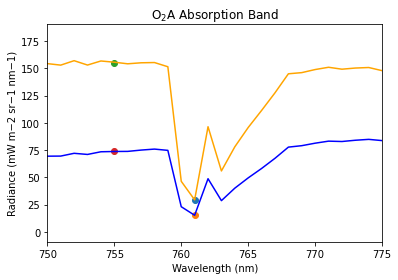

1.5600142462544888

In [128]:
# apply the sFLD method and show the plot

sFLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm = 1, band = 'A', plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the sFLD selection for the spectra values inside and outside of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

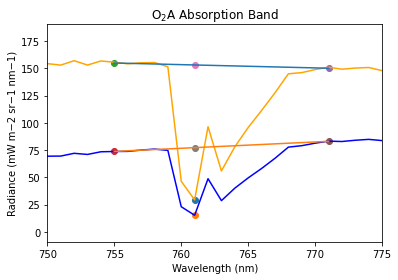

0.5353592461426143

In [129]:
# apply the 3FLD method and show the plot
three_FLD(e_first_row / np.pi, l_first_row, wavelengths, fwhm =1, band = 'A', plot = True)

The plot shows the E spectra (Orange) and L spectra (Blue) at the O2A absorption band. The plotted points show the 3FLD selection for the spectra values inside and on the shoulders of the absorption feature. The straight line plotted shows the interpolation between the two shoulders of the absorption feature and the interpolated point plotted shows the spectra value selected "outside" of the absorption feature. The value shown is the fluorescence retrieved at the O2A absorption band.

<h2>Resample the Data at Different FWHM for Sensor Simulation</h2>

In [130]:
# generate the spectras and wavelengths resampled at 3.5 nm
e_resampled, resampled_wavelengths = resample_spectra(fwhm = 3.5, spectra = e_first_row)
l_resampled = resample_spectra(fwhm=3.5, spectra= l_first_row)[0]

The 'resample_wavelengths' functions recieves the target fwhm and the desired spectra as inputs. A Gaussian convolution is then applied to the spectra and the function returns the spectra at the desired fwhm as well as the new sampling wavelengths for the spectra.

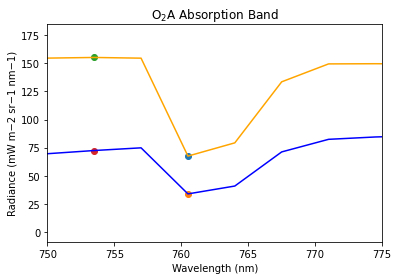

4.149036616843598

In [131]:
# now apply the FLD methods to the resampled data

sFLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, band = 'A', plot = True)

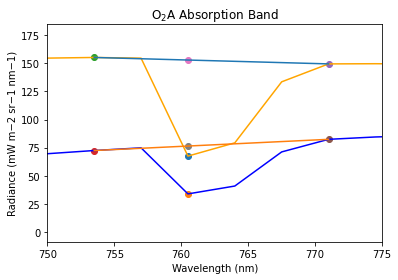

0.20516936096442012

In [132]:
three_FLD(e_resampled / np.pi, l_resampled, resampled_wavelengths, fwhm = 3.5, band = 'A', plot = True)

(0.0, 1.0)

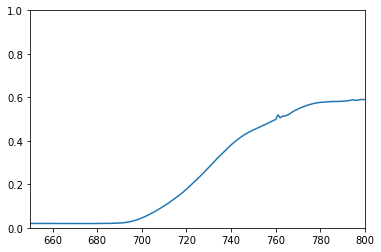

In [133]:
r_app = (l_first_row * np.pi) / e_first_row
plt.plot(wavelengths, r_app)
plt.xlim(650, 800)
plt.ylim(0, 1)

(0.0, 1.0)

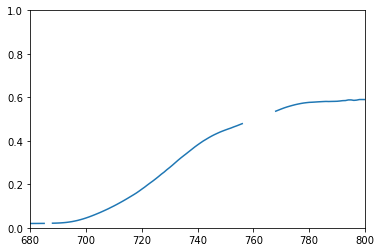

In [134]:
# define ranges of absorption bands
o2b_left_index = find_nearest(wavelengths, 686)
o2b_right_index = find_nearest(wavelengths, 688)
o2a_left_index = find_nearest(wavelengths, 757)
o2a_right_index = find_nearest(wavelengths, 768)
# set values in these ranges to NaN
r_app[o2b_left_index:o2b_right_index] = np.nan
r_app[o2a_left_index:o2a_right_index] = np.nan
# plot the resulting graph
plt.plot(wavelengths, r_app)
plt.xlim(680, 800)
plt.ylim(0, 1)

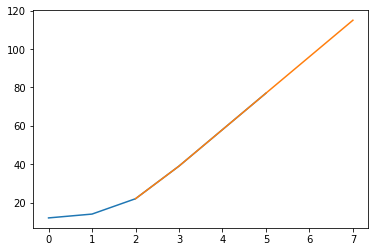

In [135]:
# now define a spline fitting function to fit these undefined ranges
from scipy import interpolate

def f(x):
    x_points = [ 0, 1, 2, 3, 4, 5]
    y_points = [12,14,22,39,58,77]

    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

x_points = [ 0, 1, 2, 3, 4, 5]
y_points = [12,14,22,39,58,77]
plt.plot(x_points, y_points)
plt.plot(np.arange(2, 8), f(np.arange(2, 8)))

(0.0, 0.8)

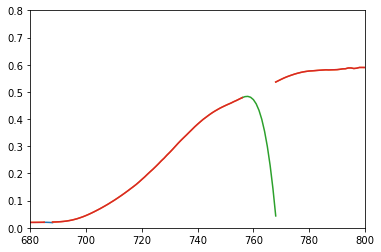

In [136]:
nan_indices = np.argwhere(np.isnan(r_app)) # get the indices of the nan values
o2b_band_indices = nan_indices[:2]
o2a_band_indices = nan_indices[2:]

# get an array of the x values used for the spline fit
x_vals = wavelengths[(int(o2b_band_indices[0]) - 20):int(o2b_band_indices[0])]
np.append(x_vals, wavelengths[(int(o2b_band_indices[-1]) + 1):int(o2b_band_indices[-1]) + 20])

# get the y vals for the spline fit
y_vals = r_app[(int(o2b_band_indices[0]) - 20):int(o2b_band_indices[0])]
np.append(y_vals, r_app[(int(o2b_band_indices[-1]) + 1):int(o2b_band_indices[-1]) + 20])

# def a new function for the cubic spline fit
def cubic_spline(x_vals, y_vals, target_x):
    tck = interpolate.splrep(x_vals, y_vals)
    return(interpolate.splev(target_x, tck))

# perform spline fit

inter_ys = cubic_spline(x_vals, y_vals, wavelengths[int(o2b_band_indices[0]) -1 : int(o2b_band_indices[-1]) + 2])

plt.plot(wavelengths[int(o2b_band_indices[0]) -1 : int(o2b_band_indices[-1]) + 2], inter_ys)
plt.plot(wavelengths, r_app)

# repeat for 02a band

nan_indices = np.argwhere(np.isnan(r_app)) # get the indices of the nan values
o2b_band_indices = nan_indices[:2]
o2a_band_indices = nan_indices[2:]

# get an array of the x values used for the spline fit
x_vals = wavelengths[(int(o2a_band_indices[0]) - 20):int(o2a_band_indices[0])]
np.append(x_vals, wavelengths[(int(o2a_band_indices[-1]) + 1):int(o2a_band_indices[-1]) + 20])

# get the y vals for the spline fit
y_vals = r_app[(int(o2a_band_indices[0]) - 20):int(o2a_band_indices[0])]
np.append(y_vals, r_app[(int(o2a_band_indices[-1]) + 1):int(o2a_band_indices[-1]) + 20])

# def a new function for the cubic spline fit
def cubic_spline(x_vals, y_vals, target_x):
    tck = interpolate.splrep(x_vals, y_vals)
    return(interpolate.splev(target_x, tck))

# perform spline fit

inter_ys = cubic_spline(x_vals, y_vals, wavelengths[int(o2a_band_indices[0]) -1 : int(o2a_band_indices[-1]) + 2])

plt.plot(wavelengths[int(o2a_band_indices[0]) -1 : int(o2a_band_indices[-1]) + 2], inter_ys)
plt.plot(wavelengths, r_app)
plt.xlim(680, 800)
plt.ylim(0, 0.8)


(0.0, 0.8)

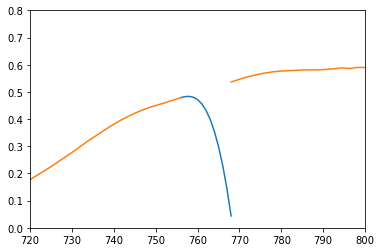

In [137]:
nan_indices = np.argwhere(np.isnan(r_app)) # get the indices of the nan values
o2b_band_indices = nan_indices[:2]
o2a_band_indices = nan_indices[2:]

# get an array of the x values used for the spline fit
x_vals = wavelengths[(int(o2a_band_indices[0]) - 20):int(o2a_band_indices[0])]
np.append(x_vals, wavelengths[(int(o2a_band_indices[-1]) + 1):int(o2a_band_indices[-1]) + 20])

# get the y vals for the spline fit
y_vals = r_app[(int(o2a_band_indices[0]) - 20):int(o2a_band_indices[0])]
np.append(y_vals, r_app[(int(o2a_band_indices[-1]) + 1):int(o2a_band_indices[-1]) + 20])

# def a new function for the cubic spline fit
def cubic_spline(x_vals, y_vals, target_x):
    tck = interpolate.splrep(x_vals, y_vals)
    return(interpolate.splev(target_x, tck))

# perform spline fit

inter_ys = cubic_spline(x_vals, y_vals, wavelengths[int(o2a_band_indices[0]) -1 : int(o2a_band_indices[-1]) + 2])

plt.plot(wavelengths[int(o2a_band_indices[0]) -1 : int(o2a_band_indices[-1]) + 2], inter_ys)
plt.plot(wavelengths, r_app)
plt.xlim(720, 800)
plt.ylim(0, 0.8)



In [138]:
def spline_fill_na(wavelengths, spectrum, df = len(wavelengths) / 50):
    """
    Wavelengths -> numpy array of the wavelengths used
    spectrum -> spectrum, sampled at given wavelength values, to fit over with NA values in the absorption features
    df -> degrees of freedom for the fit (set by default to the trace of the smoother matrix)
    """
    # look over the wavelengths to see where the NA values are
    # apply a spline fit over these values to smooth over the gaps
    # return a new smoothed spectra with no remaining NA values
    
    
    nan_indices = np.argwhere(np.isnan(spectrum)) # get the indicies of the nan values in the array
    
    # now locate the different absorption bands
    
    o2b_band_indices = nan_indices[:2] # indices for nan values in O2B band
    o2a_band_indices = nan_indices[2:] # indices for nan values in O2A band
    
    # now perform a spline fit over these regions
    
    b_x = wavelengths[o2b_band_indices[0] - 5]
    
    
    
    
    
    
    

# Implement New iFLD Retrieval Algorithm

In [ ]:
def iFLD(e_spectra, l_spectra, wavelengths, fwhm, band = 'A', plot=True):
    """ Applies the sFLD method at the O2A absorption band to extract the SIF

    Parameters
    ----------
    e_spectra : np array
        spectral array containing the incident solar radiance (directional)
    l_spectra : np array
        spectral array of the upwelling solar radiance
    wavelengths : np array
        array of the wavelength values
    fwhm: float
        full width half maximum at which the O2A band was sampled
    band: str: 'A' or 'B'
        Specifies which absorption band the retrieval algorithm should use, by default 'A' for O2A absorption band
    plot : bool, optional
        produce plot of values, by default True
    """
    
    r_spectra = l_spectra / e_spectra # get array of apparent reflectance values
    
    # now identify spectral region around the absorption band and remove
    
    
    # o2b band is 686 nm to 697 nm
    # o2a band is 759 nm to 770 nm
    
    # use find nearest function to identify the aborption features in the R spectra
    # create a new R_app_smoothed array and replace these values in the new spectra with NA
    
    # apply the spline fitting function to the R_app_smoothed array to replace the NAs with a spline fit
    
    # repeat for the E spectra
    
    # now use sFLD method to identify the values in and out and calc fitting factors
    # use these to calc the fluoresence
    
    
    buffer_in = 5 #  range to look over within absorption feature
    buffer_out = 1 # range to look over outside of the absorption feature
    
    if band == 'A':
        out_in = 0.7535*fwhm+2.8937 # define amount to skip to shoulder from minimum
        wl_in = 760 # standard location of O2A absorption feature
    if band == 'B':
        out_in = 0.697*fwhm + 1.245 # define amount to skip to shoulder from minimum
        wl_in = 687 # standard location of the O2B aboorption band
    
    # find the points in given ranges
    # find the minimum inside of the band for E_in and L_in
    e_in_index, e_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, e_spectra, 'min')
    l_in_index, l_in = stats_on_spectra(wavelengths, wl_in - buffer_in, wl_in + buffer_in, l_spectra, 'min')
    # find the average of the left shoulder for E_out and L_out
    e_out_index, e_out = stats_on_spectra(wavelengths, wl_in - buffer_out - out_in, wl_in - out_in, e_spectra, 'mean')
    l_out_index, l_out = stats_on_spectra(wavelengths, wl_in - buffer_out - out_in, wl_in - out_in, l_spectra, 'mean')
    
    if plot == True: # plot spectra and points at absorption feature
        plt.plot(wavelengths, e_spectra, color = 'orange')
        plt.plot(wavelengths, l_spectra, color = 'blue')
        plt.scatter(wavelengths[e_in_index], e_in, label = 'e_in')
        plt.scatter(wavelengths[l_in_index], l_in, label = 'l_in')
        plt.scatter(wavelengths[e_out_index], e_out, label = 'e_out')
        plt.scatter(wavelengths[l_out_index], l_out, label = 'l_out')
        #plt.legend()
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('Radiance (mW m−2 sr−1 nm−1)')
        
        # zoom to absorption band
        
        if band == 'A':
            plt.xlim(750, 775)
            plt.title('O$_2$A Absorption Band')
        
        if band == 'B':
            plt.xlim(680, 700)
            plt.title('O$_2$B Absorption Band')
        
        plt.show() # show plot
    
    fluorescence = (e_out*l_in - l_out*e_in) / (e_out - e_in) # calculate fluorescence
    
    return(fluorescence)